In [11]:
import datetime

import numpy as np
import pandas as pd
import spacy
import re
import string

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

from spacy.tokens import Token
from tqdm import tqdm

#from textblob import TextBlob
#from textblob import Word

from sklearn import utils

from gensim.models import Word2Vec
from gensim.models.phrases import Phraser, Phrases

from gensim.models.doc2vec import Doc2Vec

import gensim
import multiprocessing

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#### Importing the file ####
Path="src/"
Filename='projects_Preprocessed.csv'
df=pd.read_csv(Path+Filename)

In [3]:
## Filtering the null abstracts & short description
df=df[(pd.isnull(df.PreProcessedDescription)==False) & (df.PreProcessedDescription.str.strip()!='abstract available')& (df.PreProcessedDescription.str.len()>100)]

In [4]:
def create_tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

def create_tagged_document_based_on_tags(list_of_list_of_words, tags):
    for i in range(len(list_of_list_of_words)):
        yield gensim.models.doc2vec.TaggedDocument(list_of_list_of_words[i], [tags[i]])

In [5]:
DescDict=[[x for x in str(i).split()] for i in df.PreProcessedDescription]
tagged_value_tags = list(create_tagged_document_based_on_tags(DescDict, df.SubjectArea.tolist()))
tagged_value = list(create_tagged_document(DescDict))

In [15]:
tagged_value_tags[:2]

[TaggedDocument(words=['work', 'research', 'training', 'group', 'direct', 'model', 'method', 'spatial', 'statistic', 'application', 'natural', 'science', 'technology', 'computer', 'science', 'feedback', 'application', 'form', 'new', 'application', 'orientate', 'theory', 'mathematic', 'partner', 'science', 'main', 'emphasis', 'stochastic', 'physics', 'program', 'accompany', 'support', 'young', 'researcher', 'specialist', 'progress', 'thesis', 'order', 'improve', 'individual', 'knowledge', 'offer', 'interdisciplinary', 'contact', 'program', 'include', 'seminar', 'lecture', 'colloquium', 'special', 'research', 'project', 'involve', 'distinguished', 'scientist'], tags=['Mathematics']),
 TaggedDocument(words=['subject', 'research', 'training', 'group', 'migration', 'modern', 'europe', 'run', 'different', 'discipline', 'social', 'sciences', 'include', 'aspect', 'migration', 'migration', 'process', 'migration', 'behaviour', 'migration', 'integration', 'policy', 'form', 'consequence', 'social'

In [38]:
print(str(datetime.datetime.now()),'Started')

# Init the Doc2Vec model
model = gensim.models.doc2vec.Doc2Vec(vector_size=500, min_count=2, epochs=40, alpha = 0.02, dm=0, workers=multiprocessing.cpu_count())

# Build the Volabulary
model.build_vocab(tagged_value)

model.train(tagged_value, total_examples=len(tagged_value), epochs=40)

print(str(datetime.datetime.now()),'Completed')

2020-01-08 11:58:01.015144 Started
2020-01-08 12:06:56.223471 Completed


In [47]:
target_word='infection'
print('target_word: %r model: %s similar words:' % (target_word, model))
for i, (word, sim) in enumerate(model.wv.most_similar(target_word, topn=20), 1):
    print('    %d. %.2f %r' % (i, sim, word))

target_word: 'infection' model: Doc2Vec(dbow,d500,n5,mc2,s0.001,t4) similar words:
    1. 0.19 'pou5f3'
    2. 0.18 'borabenzene'
    3. 0.17 'rig'
    4. 0.17 'rbbp2h1'
    5. 0.17 'aberration'
    6. 0.17 'immunotherapy'
    7. 0.16 'ofdm'
    8. 0.16 'hypusin'
    9. 0.16 'twenty'
    10. 0.16 'amoebophila'
    11. 0.16 'biogeochemistry'
    12. 0.16 'phenotyping'
    13. 0.16 'lafe'
    14. 0.16 'necessitarian'
    15. 0.16 'intracisternal'
    16. 0.16 'pel'
    17. 0.16 'garnet'
    18. 0.16 'trim'
    19. 0.15 'itm'
    20. 0.15 'ditched'


In [43]:
#model.wv.index2word[50:60]

import random

word_models = model

def pick_random_word(model, threshold=10):
    # pick a random word with a suitable number of occurences
    while True:
        word = random.choice(model.wv.index2word)
        if model.wv.vocab[word].count > threshold:
            return word

#target_word = pick_random_word(model)
# or uncomment below line, to just pick a word from the relevant domain:
# target_word = 'comedy/drama'

for target_word in model.wv.index2word[50:60]:
    print('target_word: %r model: %s similar words:' % (target_word, model))
    for i, (word, sim) in enumerate(model.wv.most_similar(target_word, topn=10), 1):
        print('    %d. %.2f %r' % (i, sim, word))
    print()

target_word: 'complex' model: Doc2Vec(dbow,d500,n5,mc2,s0.001,t4) similar words:
    1. 0.18 'chemotherapy'
    2. 0.18 'fma'
    3. 0.18 'yemen'
    4. 0.18 'monge'
    5. 0.17 'noradrenalin'
    6. 0.16 'informed'
    7. 0.16 'versatilely'
    8. 0.16 'hyperoxic'
    9. 0.16 'mapkinase'
    10. 0.16 '11c'

target_word: 'phase' model: Doc2Vec(dbow,d500,n5,mc2,s0.001,t4) similar words:
    1. 0.20 'minden'
    2. 0.18 'pharynx'
    3. 0.18 'luminosity'
    4. 0.17 'transendothelial'
    5. 0.17 'kid1'
    6. 0.17 'cd18hypo'
    7. 0.17 'dn15'
    8. 0.17 'ncx'
    9. 0.17 'portamento'
    10. 0.16 '22spiro'

target_word: 'identify' model: Doc2Vec(dbow,d500,n5,mc2,s0.001,t4) similar words:
    1. 0.19 'immotile'
    2. 0.19 'vaccinated'
    3. 0.18 'cazymes'
    4. 0.18 'korbacher'
    5. 0.18 'caliphate'
    6. 0.17 'frauenleben'
    7. 0.17 'icn'
    8. 0.17 'neomycin'
    9. 0.17 'c06'
    10. 0.17 'knife'

target_word: 'surface' model: Doc2Vec(dbow,d500,n5,mc2,s0.001,t4) similar wor

In [16]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs#.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [49]:
#targets, regressors=vec_for_learning(model, tagged_value)
model_result=[]

with tqdm(total=len(tagged_value)) as bar:
    for i in tagged_value: #[:510]
        model_result.append(model.infer_vector(i.words, steps=20))
        bar.update(1)

100%|██████████| 52125/52125 [06:29<00:00, 133.99it/s]


In [51]:
#model.docvecs[2]
len(model_result)

52125

In [109]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100) 
X = kmeans_model.fit(model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()

l = kmeans_model.fit_predict(model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(model.docvecs.doctag_syn0)
datapoint = pca.transform(model.docvecs.doctag_syn0)

In [5]:
df.head()

,Name,SubUrl,FundingFrom,FundingEnd,SubjectArea,Institution,Description,Translates,Name_Translated,PreProcessedDescription
0,GRK 6:&nbsp; Spatial Statistics,/gepris/projekt/268853,1997,2003,Mathematics,Technische Universität Bergakademie Freiberg,The work of the research training group is dir...,The work of the research training group is dir...,GRK 6:&nbsp; Spatial Statistics,work research training group direct model meth...
1,GRK 12:&nbsp; Migration in Modern Europe,/gepris/projekt/268931,1995,2004,Social Sciences,Universität Osnabrück,The subject of the research training group 'Mi...,The subject of the research training group 'Mi...,GRK 12:&nbsp; Migration in Modern Europe,subject research training group migration mode...
2,GRK 45:&nbsp; Integrated Fluidical Sensor-Actu...,/gepris/projekt/269237,1995,2004,Production Technology,Universität Rostock,The goal of this program consists in the mathe...,The goal of this program consists in the mathe...,GRK 45:&nbsp; Integrated Fluidical Sensor-Actu...,goal program consist mathematical formulation ...
3,GRK 52:&nbsp; Quantum Field Theory: Mathematic...,/gepris/projekt/269303,1995,2004,Condensed Matter Physics,Universität Leipzig,The aim of the research training group is to p...,The aim of the research training group is to p...,GRK 52:&nbsp; Quantum Field Theory: Mathematic...,aim research training group pass generation sc...
4,GRK 115:&nbsp; Ocean Engineering Structures,/gepris/projekt/269869,1995,2004,Construction Engineering and Architecture,Technische Universität Hamburg,Ocean engineering encompasses a wide variety o...,Ocean engineering encompasses a wide variety o...,GRK 115:&nbsp; Ocean Engineering Structures,ocean engineering encompass wide variety area ...


In [152]:
df['KmeanLabels']=kmeans_model.labels_

In [166]:
clusters={0:[],1:[],2:[],3:[]}
for i in range(4):
    clusters[i]=df[df['KmeanLabels']==i]['SubjectArea'].unique()

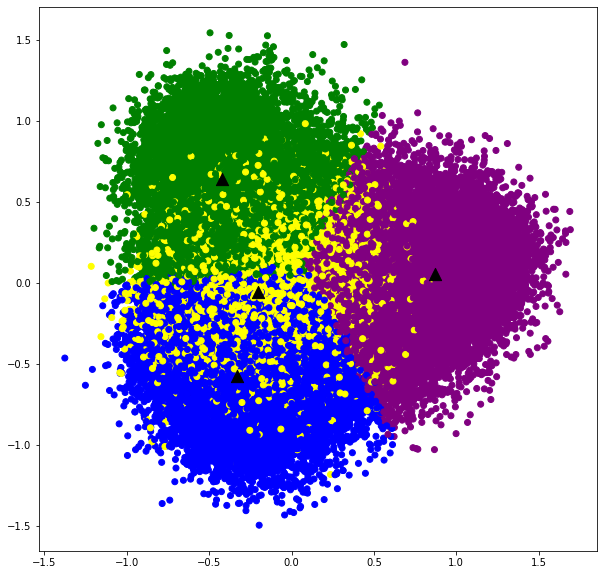

In [125]:
figure(num=None, figsize=(10,10))
plt.figure
label1 = ['#FFFF00', '#008000', '#0000FF', "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()